# Regressão Linear - Exemplo real - parte 5

* Determinando a relação linear entre umidade e temperatura utilizando dados da cidade de Szeged localizada na Hungria. Este é um dataset público do Kaggle (https://www.kaggle.com/budincsevity/szeged-weather)
* Henrique Sérgio de Aquino

In [1]:
# importando bibliotecas de projeto de machine learning
# numpy biblioteca numérica, pandas, biblioteca de manipulacao de dados, matplotlib, biblioteca de plotagem de graficos
# seaborn, biblioteca de visualizacao de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lendo dados de um arquivo csv
dados = pd.read_csv('weatherHistory.csv')

In [3]:
#exibindo o cabeçalho e os primeiros registros
dados.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Exibindo nomes das colunas

In [4]:
#exibindo as colunas do dataframe
dados.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

As colunas Formatted Date, Summary e Daily Summary não são relevantes, podendo ser excluidas

In [5]:
#eliminando colunas desnecessárias
dados = dados.drop(['Formatted Date','Summary','Daily Summary'],axis=1)

In [6]:
# exibindo os primeiros registros do dataframe
dados.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


Determinando os tipos de precipitação

In [7]:
# retornando um array numpy
dados['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [8]:
dados['Precip Type'] = dados['Precip Type'].fillna('sunny')

In [9]:
dados['Precip Type'].unique()

array(['rain', 'snow', 'sunny'], dtype=object)

<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

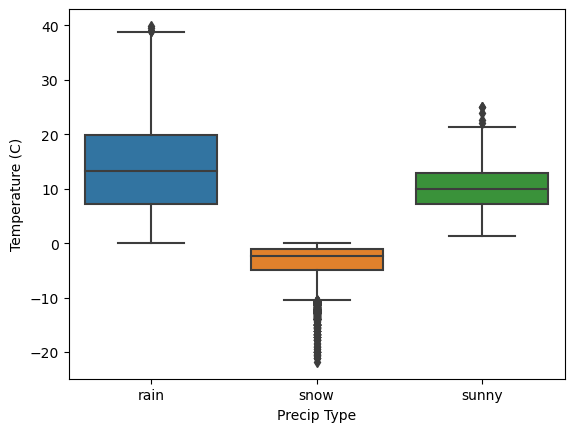

In [10]:
# gerando gráfico box plot
sns.boxplot(data=dados,y='Temperature (C)',x='Precip Type')

Para os casos em que o tipo de precipitação são nulos, temos um dia sem chuva. Desta forma iremos fazer uma análise para cada um dos três casos

In [11]:
dias_sol = dados[(dados['Precip Type'] == 'sunny')]

In [12]:
dias_chuva = dados[(dados['Precip Type'] == 'rain')]

In [13]:
dias_neve = dados[(dados['Precip Type'] == 'snow')]

Graficando umidade em função da temperatura

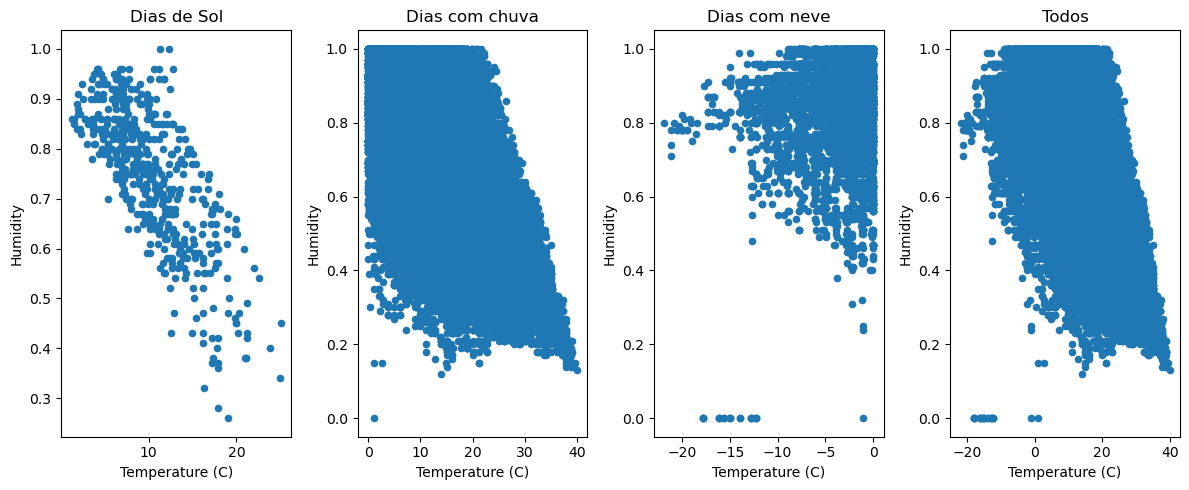

In [14]:
fig, ax = plt.subplots(1,4,figsize=(12,5))
dias_sol.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[0],title='Dias de Sol');
dias_chuva.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[1],title='Dias com chuva');
dias_neve.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[2],title='Dias com neve');
dados.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[3],title='Todos');
plt.tight_layout();

Dos gráficos observamos que os dias com sol apresentam uma relação mais próxima da linear. Nos dias com chuva podemos observar uma possível relação linear porém com uma dispersão muito maior. Já os dias com neve não é clara uma relação linear

# Dias de sol

In [15]:
# exibindo informacoes sobre as colunas, como os seus tipos de dados
dias_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    float64
 2   Apparent Temperature (C)  517 non-null    float64
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    float64
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    float64
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB


In [16]:
# somando todos os valores NaN
dias_sol.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

Armazenando temperatura e umidade nas variáveis X e Y

In [17]:
X = dias_sol['Temperature (C)'].values.reshape(-1, 1)
Y = dias_sol['Humidity'].values.reshape(-1, 1)

Separando valores em amostras de treino e teste

In [18]:
# importando biblioteca para separar dados de treino e dados de teste
from sklearn.model_selection import train_test_split

In [19]:
# separando 70% dos dados para treino e 30% dos dados para teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)

In [20]:
X_treino.size

361

In [21]:
X_teste.size

156

Criando modelo de regressão linear

In [22]:
# importando o modelo de regressao linear
from sklearn.linear_model import LinearRegression

In [23]:
# instanciando o modelo
modelo = LinearRegression()

In [24]:
# treinando o modelo
modelo.fit(X_treino,Y_treino)

LinearRegression()

In [25]:
# fazendo a previsao
Y_previsto = modelo.predict(X_teste)

Graficando valores reais e previstos

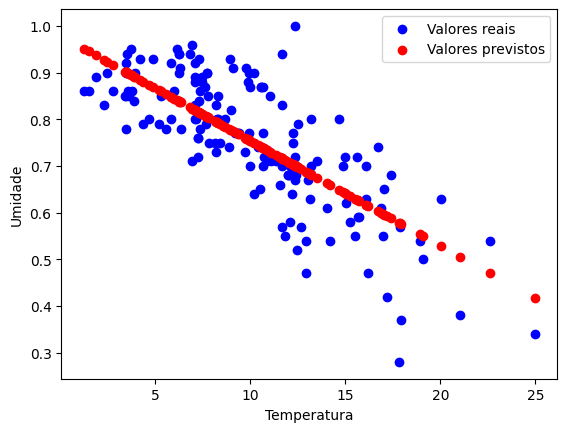

In [26]:
plt.scatter(X_teste,Y_teste,color='blue',label='Valores reais')
plt.scatter(X_teste,Y_previsto,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

Analisando erros da previsão

In [26]:
# importando bibliotecas para geracao de métricas
# métricas: mean absolute error e mena squared error
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
MAE_sol = mean_absolute_error(Y_teste,Y_previsto)
RMSE_sol = np.sqrt(mean_squared_error(Y_teste,Y_previsto))

In [28]:
print('MAE = {:0.4f}'.format(MAE_sol))
print('RMSE = {:0.4f}'.format(RMSE_sol))

MAE = 0.0698
RMSE = 0.0891


# Dias de chuva

In [29]:
# exibindo informacoes sobre as colunas, como os seus tipos de dados
dias_chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85224 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               85224 non-null  object 
 1   Temperature (C)           85224 non-null  float64
 2   Apparent Temperature (C)  85224 non-null  float64
 3   Humidity                  85224 non-null  float64
 4   Wind Speed (km/h)         85224 non-null  float64
 5   Wind Bearing (degrees)    85224 non-null  float64
 6   Visibility (km)           85224 non-null  float64
 7   Loud Cover                85224 non-null  float64
 8   Pressure (millibars)      85224 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.5+ MB


In [30]:
# somando todos os valores NaN
dias_chuva.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [31]:
X_chuva = dias_chuva['Temperature (C)'].values.reshape(-1, 1)
Y_chuva = dias_chuva['Humidity'].values.reshape(-1, 1)

In [32]:
X_treino_chuva, X_teste_chuva, Y_treino_chuva, Y_teste_chuva = train_test_split(X_chuva, Y_chuva, test_size=0.30, shuffle=True, random_state=0)

In [33]:
X_treino_chuva.size

59656

In [34]:
X_teste_chuva.size

25568

In [35]:
modelo2 = LinearRegression()

In [36]:
modelo2.fit(X_treino_chuva,Y_treino_chuva)

LinearRegression()

In [37]:
Y_previsto_chuva = modelo2.predict(X_teste_chuva)

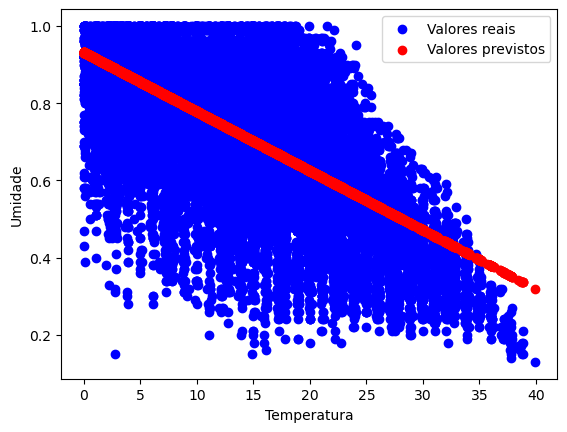

In [38]:
plt.scatter(X_teste_chuva,Y_teste_chuva,color='blue',label='Valores reais')
plt.scatter(X_teste_chuva,Y_previsto_chuva,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [39]:
MAE_chuva = mean_absolute_error(Y_teste_chuva,Y_previsto_chuva)
RMSE_chuva = np.sqrt(mean_squared_error(Y_teste_chuva,Y_previsto_chuva))

In [40]:
print('MAE = {:0.4f}'.format(MAE_chuva))
print('RMSE = {:0.4f}'.format(RMSE_chuva))

MAE = 0.1211
RMSE = 0.1506


# Dias com neve

In [41]:
dias_neve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 1562 to 93506
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               10712 non-null  object 
 1   Temperature (C)           10712 non-null  float64
 2   Apparent Temperature (C)  10712 non-null  float64
 3   Humidity                  10712 non-null  float64
 4   Wind Speed (km/h)         10712 non-null  float64
 5   Wind Bearing (degrees)    10712 non-null  float64
 6   Visibility (km)           10712 non-null  float64
 7   Loud Cover                10712 non-null  float64
 8   Pressure (millibars)      10712 non-null  float64
dtypes: float64(8), object(1)
memory usage: 836.9+ KB


In [42]:
dias_neve.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [43]:
X_neve = dias_neve['Temperature (C)'].values.reshape(-1, 1)
Y_neve = dias_neve['Humidity'].values.reshape(-1, 1)

In [44]:
X_treino_neve, X_teste_neve, Y_treino_neve, Y_teste_neve = train_test_split(X_neve, Y_neve, test_size=0.30, shuffle=True, random_state=0)

In [45]:
X_treino_neve.size

7498

In [46]:
X_teste_neve.size

3214

In [47]:
modelo3 = LinearRegression()

In [48]:
modelo3.fit(X_treino_neve,Y_treino_neve)

LinearRegression()

In [49]:
Y_previsto_neve = modelo3.predict(X_teste_neve)

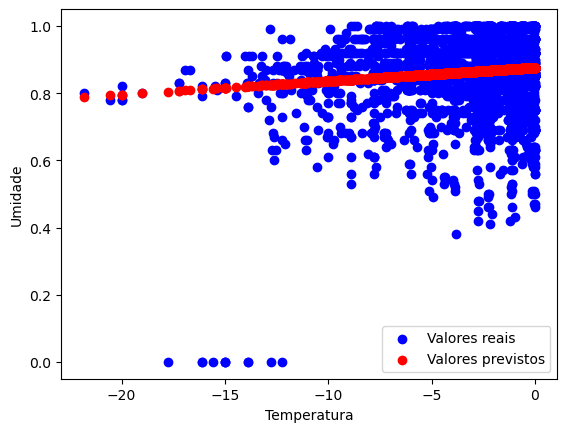

In [50]:
# gerando o grafico scatter plot
plt.scatter(X_teste_neve,Y_teste_neve,color='blue',label='Valores reais')
plt.scatter(X_teste_neve,Y_previsto_neve,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [51]:
# métricas de avaliacao do regressao linear: mean absolute error e mean squared error
MAE_neve = mean_absolute_error(Y_teste_neve,Y_previsto_neve)
RMSE_neve = np.sqrt(mean_squared_error(Y_teste_neve,Y_previsto_neve))

In [53]:
print('MAE = {:0.4f}'.format(MAE_neve))
print('RMSE = {:0.4f}'.format(RMSE_neve))

MAE = 0.0824
RMSE = 0.1130
